In [92]:
#Javaria Ahmad
# The goal is to identify the healthcare standard per state from two data sets.

# imports

import numpy as np
import pandas as pd
import os

In [93]:
# path
raw_path = os.path.join(os.path.pardir,'data','raw')
payments_file=os.path.join(raw_path,'MedicarePayments.csv')
registered_file=os.path.join(raw_path,'MedicareRegisteredHospital.csv')

In [94]:
#Loading into data frames
df_payments=pd.read_csv(payments_file)
df_registered=pd.read_csv(registered_file)
type(df_payments)
type(df_registered)

pandas.core.frame.DataFrame

In [95]:
#Merge two data sets on Provide Id. One data set has hospital and transactions information. Other tells if the hospitals are registered with medicare, and hospital rating etc.
df_left = pd.merge(df_payments, df_registered, on='Provider Id', how='left')

#identify Medicare registered hospitals and create a feature.
df_left['Registered'] = np.where (df_left['Location'].isnull(), 'No', 'Yes')

#Create a feature and categorize Average Medicare Payments as hign and low
df_left['AvgPayments'] = np.where (df_left['AverageMedicarePayments']>=30000, 'High', 'Low')
df_left


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,ProviderState,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Registered,AvgPayments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"1108 ROSS CLARK CIRCLE DOTHAN, AL 36301 (31.21...",Yes,Low
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH BOAZ, AL 35957",Yes,Low
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"1701 VETERANS DRIVE FLORENCE, AL 35630 (34.802...",Yes,Low
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"50 MEDICAL PARK EAST DRIVE BIRMINGHAM, AL 3523...",Yes,Low
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,"1000 FIRST STREET NORTH ALABASTER, AL 35007 (3...",Yes,Low
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,...,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"2105 EAST SOUTH BOULEVARD MONTGOMERY, AL 36116...",Yes,Low
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,...,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"2000 PEPPERELL PARKWAY OPELIKA, AL 36801 (32.6...",Yes,Low
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,...,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,"619 SOUTH 19TH STREET BIRMINGHAM, AL 35233 (33...",Yes,Low
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,...,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,"101 SIVLEY RD HUNTSVILLE, AL 35801 (34.721226,...",Yes,Low
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,...,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,"1007 GOODYEAR AVENUE GADSDEN, AL 35903 (34.009...",Yes,Low


In [96]:
#Number of states with hospitals with these features: Medicare registered, high medicare payments, good hospital rating
#Get counts per state to identify the states providing good healthcare
df_highHCStandard = df_left[df_left['ProviderState'].notnull() & (df_left['Registered'] == "Yes")& (df_left['AvgPayments'] == "High") & (df_left['HospitalOverallRating'] > 3)]
df_highHCStandard.groupby('ProviderState').ProviderState.count()


ProviderState
AK     11
AL     39
AR     25
AZ     79
CA    638
CO     42
CT     72
DC     22
DE     12
FL    205
GA    118
HI     13
IA     21
ID     11
IL    210
IN     73
KS     23
KY     57
LA     52
MA    118
MD    170
ME     15
MI    152
MN     61
MO     85
MS     47
MT      9
NC    116
ND     14
NE     17
NH     18
NJ    182
NM     19
NV     41
NY    374
OH    116
OK     44
OR     31
PA    159
RI     20
SC     66
SD     13
TN     61
TX    261
UT     13
VA     94
VT      9
WA     86
WI     52
WV     21
WY      5
Name: ProviderState, dtype: int64

Text(0,0.5,'Number of hospitals')

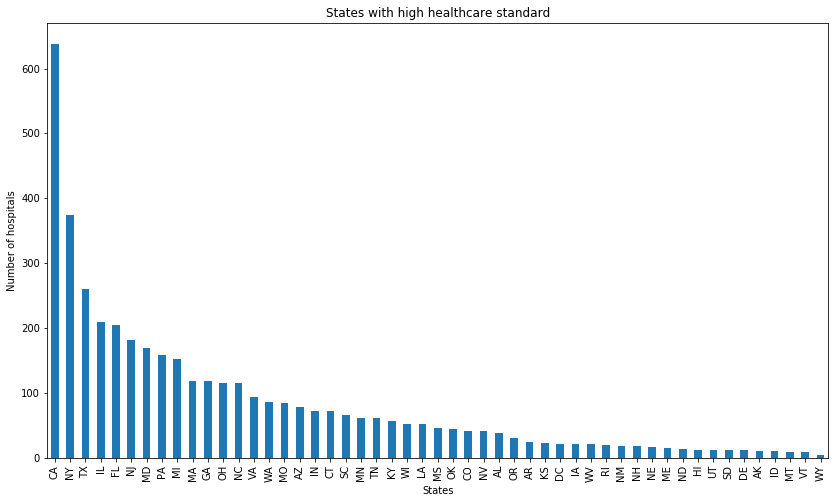

In [97]:
ax = df_highHCStandard['ProviderState'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="States with high healthcare standard")
ax.set_xlabel("States")
ax.set_ylabel("Number of hospitals")